# Project 2: Investigate A Dataset of Brazilian Patient Appointment Records

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This investigation addresses the problem of impoverished Brazilian citizens not showing up to their scheduled medical appointments. It has been found that enabling Brazilian citizens to get regular checkups helps them maintain good health as they work to enhance their economic quality of life and work to escape poverty. Enrollees often, however, do not make many of their appointments, driving program costs up. To ensure families in the program are making progress in their healthcare, data has been gathered to investigate the strongest causes of patient absenteeism.
> The dataset used for the investigation comes from an organization that monitors patients enrolled in Brazil's Bolsa Família program. It is somewhat of a raw form, and will need cleaned to render it usable for analysis.
> The main goal of the analysis is to see what variables are the most correlated with patient absenteesism.
> The goal of this investigation is to find at least three varaibles that could be recommended as areas to look into further in making recommendations for improving patient attendance for future program runs.
> This investigation attempts to address three research questions:

* Research Question 1: How is age related to patient attendance?


* Research Question 2: Did text notifications or enrollment in Bolsa Familia lead to increased patient attendance?


* Research Question 3: How are the health variables are most associated with patient attendance?

The first step is to load the necessary data analysis packages, such as pandas.

In [1]:
# Import these packages to give any needed ability to manipulate Dataframes, plots and arrays, as needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we check the dataset's general properties and identify opportunities for cleaning and readability improvments.

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Load dataset into dataframe and see the first few rows of raw data.

In [3]:
def shape():
    return df.shape
    
shape()

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


These cells help us see the number of rows and columns, basic statistics and data types of the columns. Fortunately, there are no null values to process.

### Data Cleaning

In [6]:
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'ScheduledDay', 'Neighbourhood'], axis = 1, inplace = True)

Drop these columns as they are not the target of the analysis.

In [7]:
df.columns=df.columns.str.lower()
df.head(2)

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No


Make the column names lower-case for ease of typing.

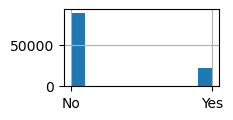

In [8]:
df['no-show'].hist(figsize=(2,1));

It seems 'no-show' has about 3-4 times the number of successful attendance to no-shows. But htis formatting is nonintuitive.

In [9]:
df.rename(columns ={'hipertension':'hypertension', 'no-show':'present', 'handcap':'mobility_handicap','sms_received':'text_notification'}, inplace = True)
df.head(2)

,gender,age,scholarship,hypertension,diabetes,alcoholism,mobility_handicap,text_notification,present
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No


Rename the columns to correct spelling errors and make the column titles more intuitive. Of note, I switched 'no-show' to 'present' to more easily see whether patients went to their appointments in the affirmative.

In [10]:
df['scholarship'] = df['scholarship'].replace({1:'Enrolled', 0:'Unenrolled'})
df['hypertension'] = df['hypertension'].replace({1:'High_BP', 0:'Normal_BP'})
df['diabetes'] = df['diabetes'].replace({1:'Diabetic', 0:'Nondiabetic'})
df['alcoholism'] = df['alcoholism'].replace({1:'Often_Drunk', 0:'Sober'})
df['mobility_handicap'] = df['mobility_handicap'].replace({1:'Immobile', 0:'Mobile'})
df['text_notification'] = df['text_notification'].replace({1:'Texted', 0:'Not_Texted'})
df['present'] = df['present'].replace({'Yes':'No', 'No':'Yes'})
df.head(2)

,gender,age,scholarship,hypertension,diabetes,alcoholism,mobility_handicap,text_notification,present
0,F,62,Unenrolled,High_BP,Nondiabetic,Sober,Mobile,Not_Texted,Yes
1,M,56,Unenrolled,Normal_BP,Nondiabetic,Sober,Mobile,Not_Texted,Yes


Changed labels to make them more readable in graphs and to make more sense tha just 0 or 1. Also swapped 'present' column so that 'Yes' means they showed up and 'No' means they didn't.

In [11]:
# df['scholarship'] = df.scholarship.astype(bool)
# df['hypertension']  = df.hypertension.astype(bool)
# df['diabetes']  = df.diabetes.astype(bool)
# df['alcoholism']  = df.alcoholism.astype(bool)
# df['mobility_handicap']  = df.mobility_handicap.astype(bool)
# df['text_notification']  = df.text_notification.astype(bool)
# df['present']  = df.present.astype(bool)
df['age'] = df.age.astype(int)

I attempted using type boolean for these categories, but they didn't work well for charts, so I commented them out. I switched 'age' to type integer, since it sometimes switches to type string at this stage.

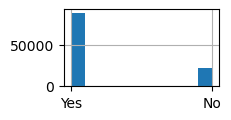

In [12]:
df['present'].hist(figsize=(2,1));

Observes the new 'present' results to verify changes went through.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   gender             110527 non-null  object
 1   age                110527 non-null  int32 
 2   scholarship        110527 non-null  object
 3   hypertension       110527 non-null  object
 4   diabetes           110527 non-null  object
 5   alcoholism         110527 non-null  object
 6   mobility_handicap  110527 non-null  object
 7   text_notification  110527 non-null  object
 8   present            110527 non-null  object
dtypes: int32(1), object(8)
memory usage: 7.2+ MB


In [14]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,mobility_handicap,text_notification,present
0,F,62,Unenrolled,High_BP,Nondiabetic,Sober,Mobile,Not_Texted,Yes
1,M,56,Unenrolled,Normal_BP,Nondiabetic,Sober,Mobile,Not_Texted,Yes
2,F,62,Unenrolled,Normal_BP,Nondiabetic,Sober,Mobile,Not_Texted,Yes
3,F,8,Unenrolled,Normal_BP,Nondiabetic,Sober,Mobile,Not_Texted,Yes
4,F,56,Unenrolled,High_BP,Diabetic,Sober,Mobile,Not_Texted,Yes


Verfiy the changes in the dataframe had the desired effect. It looks more readable and 'age' is type integer.

In [15]:
df.describe()

,age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Only 'age' computes statistics, which will be evident during the exploratory analysis (below).

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How is age related to patient attendance?

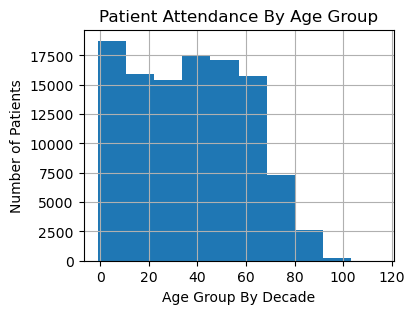

In [16]:
df.hist(figsize=(4,3))
plt.xlabel('Age Group By Decade')
plt.ylabel('Number of Patients')
plt.title('Patient Attendance By Age Group');

The majority of the patients are below 70 years old (histogram skewed to the left). Let's see a breakdown of attendance categories by age next.

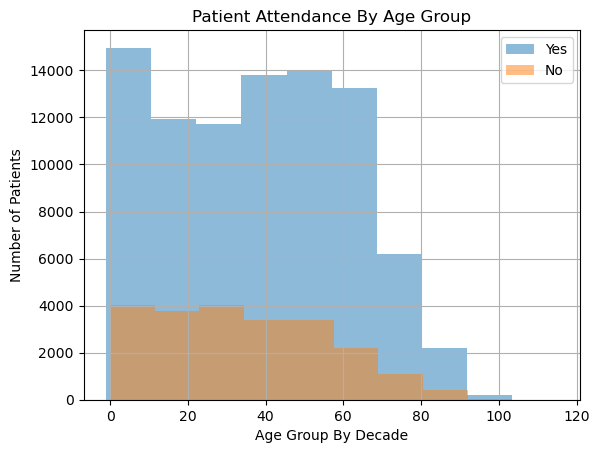

In [17]:
yes = df.present == 'Yes'
no = df.present == 'No'

df.age[yes].hist(alpha=0.5, bins=10, label='Yes')
df.age[no].hist(alpha=0.5, bins=10, label='No')
plt.xlabel('Age Group By Decade')
plt.ylabel('Number of Patients')
plt.title('Patient Attendance By Age Group')
plt.legend();

Based on the above histogram, it appears that patients younger than 70 years of age have a good chance to make their appointments. Whereas, patients under age 55 tend to be most likely to skip appointments. It seems that older ages aren't as likely to quit as younger folks. Curiously, patients 10 and under (children) and middle-aged folks (35-70) tend to be most faithful to attend appointments. Patients under 55 years of age tend to be about even if their absenteeism.

### Research Question 2: Did text notifications or enrollment in Bolsa Familia lead to increased patient attendance?

present  text_notification
No       Not_Texted           12535
         Texted                9784
Yes      Not_Texted           62510
         Texted               25698
Name: text_notification, dtype: int64


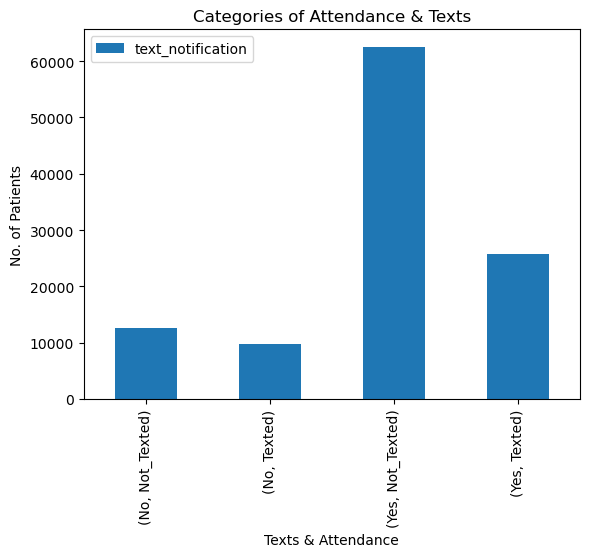

In [18]:
print(df.groupby('present')['text_notification'].value_counts())
df.groupby('present')['text_notification'].value_counts().plot(kind='bar')
plt.xlabel('Texts & Attendance')
plt.ylabel('No. of Patients')
plt.title('Categories of Attendance & Texts')
plt.legend();

This is exploratory, but we can make a neater, stacked bar chart below.

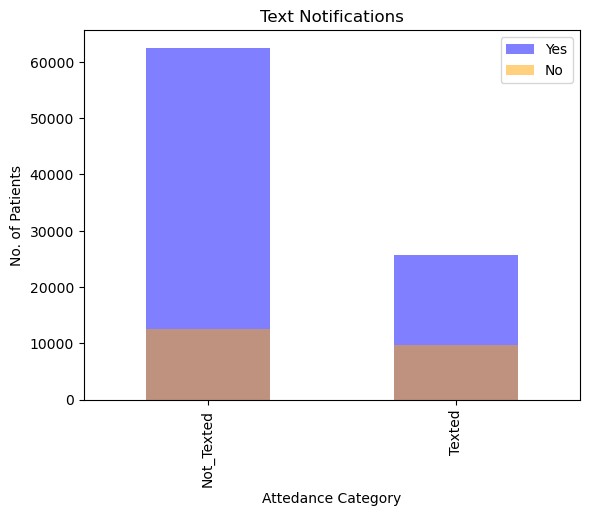

In [19]:
df.text_notification[yes].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Yes')
df.text_notification[no].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='No')
plt.xlabel('Attedance Category')
plt.ylabel('No. of Patients')
plt.title('Text Notifications')
plt.legend();

It seems texting made little difference in patients who didn't attend their appointments. Those who did attend most often did not receive text notifications, which is the opposite of what I expected. It may be due to extenuating factors such as these patients often being unable to afford smartphones. 

present  scholarship
No       Unenrolled     19741
         Enrolled        2578
Yes      Unenrolled     79925
         Enrolled        8283
Name: scholarship, dtype: int64


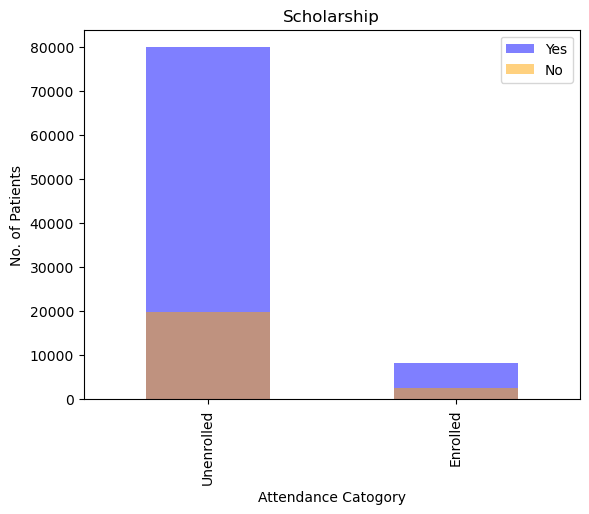

In [20]:
print(df.groupby('present')['scholarship'].value_counts())
df.scholarship[yes].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Yes')
df.scholarship[no].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='No')
plt.xlabel('Attendance Catogory')
plt.ylabel('No. of Patients')
plt.title('Scholarship')
plt.legend();

Much like text notifications, enrollment in Bolsa Familia has minimal impact on patient attendance. Unlike the former, however, it seems patients not enrolled are more likely to not show up for appointments. It could be the program has requirements patients don't want to meet.

### Research Question 3: How are the health variables are most associated with patient attendance?

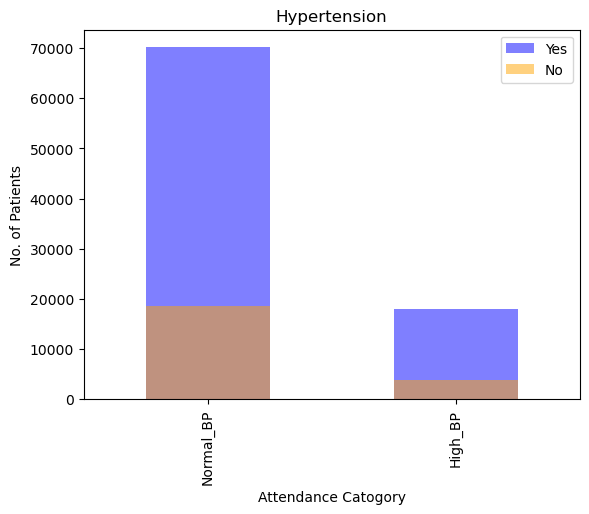

In [21]:
df.hypertension[yes].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Yes')
df.hypertension[no].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='No')
plt.xlabel('Attendance Catogory')
plt.ylabel('No. of Patients')
plt.title('Hypertension')
plt.legend();

There are few no-show datapoints, but it seems at least some patients have high blood pressure who avoid their appoinments.

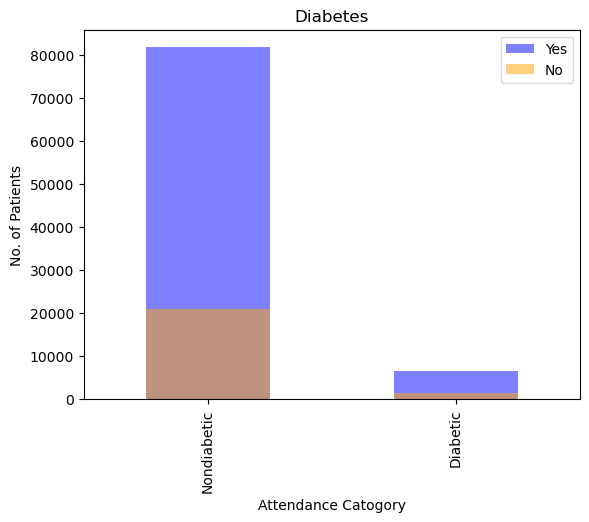

In [22]:
df.diabetes[yes].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Yes')
df.diabetes[no].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='No')
plt.xlabel('Attendance Catogory')
plt.ylabel('No. of Patients')
plt.title('Diabetes')
plt.legend();

There are very few no-show datapoints.

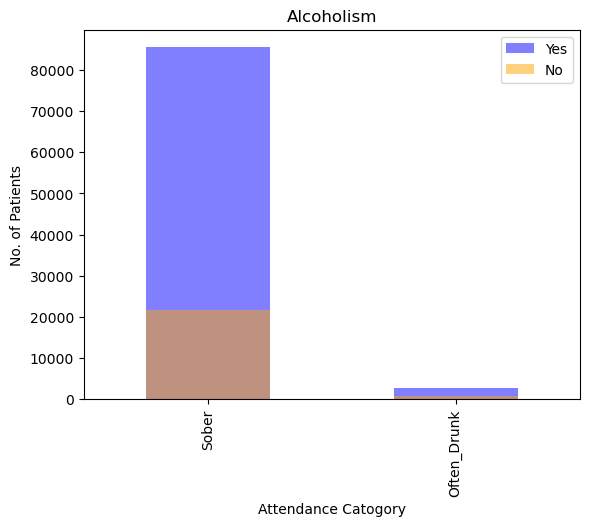

In [23]:
df.alcoholism[yes].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Yes')
df.alcoholism[no].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='No')
plt.xlabel('Attendance Catogory')
plt.ylabel('No. of Patients')
plt.title('Alcoholism')
plt.legend();

There are very few no-show datapoints.

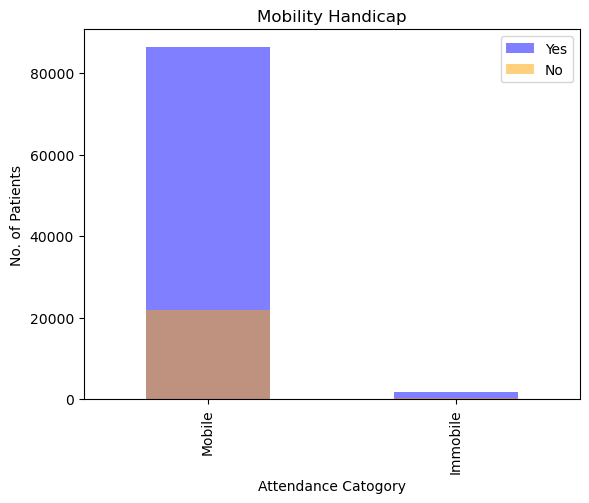

In [24]:
df = df[df.mobility_handicap.isin(['Mobile', 'Immobile']) == True] # Eliminates stray integer values that are not useful.
df.mobility_handicap[yes].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Yes')
df.mobility_handicap[no].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='No')
plt.xlabel('Attendance Catogory')
plt.ylabel('No. of Patients')
plt.title('Mobility Handicap')
plt.legend();

There are very few no-show datapoints.

Of all the health variables, only hypertension has an appreciable amount of patients who had a tendency to not show up due to having the condition. All of the variables have a majority of patients who are healthy and still make their appointments, so more exploration would be needed to see a definite correlation in how health affects patient attendance.

<a id='conclusions'></a>
## Conclusions

Given the data available, it is difficult to see what variables truly impact patient attendance, but we can consider the following observations from our investigation and use them as starting points for future investigations.

* First, it would be nice to have more actual absentee datapoints to see a better difference in things like health variables.


* Second, patients under age 10 and at middle age were the most faithful in their attendance, whereas no-show patients were relatively consistent across most age groups under middle age. Regardless, most patients under 70 account for the majority of patients, so the elderly are not strongly supported by the Brazilian program.


* Third, text notifications did not seem to significantly impact attendance, as the number of shows and no-shows were about the same. Enrollment in Bolsa Familia did not seem to help encourage patient attendance, as there were many times more no-show patients not enrolled than enrolled. In fact, the majority of shows had neither element of enciuragement.


* Lastly, hypertension was the only category that ssemed to have a significant amount of patients in both the show and no-show categories we could see any appreciable impact on no-shows, but even this effect is a few times smaller than for patients with normal blood pressure. It does seem hypertension is worth investigating further, but we don't seem to have enough information to draw any definite conclusions yet.


* As a final thought, we could investigate how hypertension impacts attendance, but we may need more data. We can also look at the columns we dropped on locations to see what impact distance to the clinic from patient residences has.

<a id='limitations'></a>
## Limitations

* Many of the columns are categorical, making it difficult to draw inferential conclusions like we normally would from numerical data.


* More datapoints would be useful for drawing conclusions from the health variables.


* It feels like it is difficult to draw strong conclusions from any of the categories, since datapoints for no-shows are relatively uncommon compared to shows.


* The staticstics used were descriptive, not inferential, so we only have a rough idea of how things work, as opposed to rigorous conclusions.

<a id='conclusions'></a>
## Cited Sources

* https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia (Accessed 9/21/2022)


* https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub (Accessed 9/21/2022)


* noshowappointments-kagglev2-may-2016.csv (Course-Provided Dataset)